Got my dataset from:

- https://www.kaggle.com/alessiocorrado99/animals10

- https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

- https://www.kaggle.com/crawford/cat-dataset

- my friend Tyler

Project outline:
1. find images- done
2. turn images into usable data set/array - done
3. split into training and testing - done
4. make training algorithm - done
5. fix it -done
6. if works then done with main project -done 
7. make some type of model? - kind of done
8. rerun with some new parameters -done
9. try with video? - done

In [2]:
import tensorflow as tf

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import log_loss
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from load_data import load_data, load_resized_data
import numpy as np
import os
from os.path import join
import time


In [4]:
img = plt.imread(join("images", "dog", "OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg"))

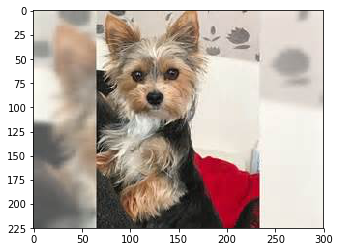

In [5]:
plt.imshow(img)

In [14]:
X_train, X_valid, Y_train, Y_valid = load_resized_data(100,100)

['cat', 'dog']
------------------------------
Creating training images...
------------------------------
Loading done.


In [15]:
num_classes = 2
channel = 3 #RGB
batch_size = 128
num_epoch = 15

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 32)        9248      
__________

In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
t=time.time()
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, 
                     shuffle=False, validation_data= (X_valid,Y_valid))
#compute the training time
print('Training time: %s' % (time.time()-t))

Instructions for updating:
Use tf.cast instead.
Train on 16228 samples, validate on 4058 samples
Epoch 1/15
16228/16228 [==============================] - 134s 8ms/step - loss: 0.6762 - acc: 0.5596 - val_loss: 0.6205 - val_acc: 0.6575
Epoch 2/15
16228/16228 [==============================] - 124s 8ms/step - loss: 0.6201 - acc: 0.6611 - val_loss: 0.5823 - val_acc: 0.6959
Epoch 3/15
16228/16228 [==============================] - 124s 8ms/step - loss: 0.5863 - acc: 0.6896 - val_loss: 0.5460 - val_acc: 0.7247
Epoch 4/15
16228/16228 [==============================] - 124s 8ms/step - loss: 0.5494 - acc: 0.7205 - val_loss: 0.5100 - val_acc: 0.7504
Epoch 5/15
16228/16228 [==============================] - 125s 8ms/step - loss: 0.5133 - acc: 0.7461 - val_loss: 0.4863 - val_acc: 0.7644
Epoch 6/15
16228/16228 [==============================] - 124s 8ms/step - loss: 0.4818 - acc: 0.7668 - val_loss: 0.4615 - val_acc: 0.7785
Epoch 7/15
16228/16228 [==============================] - 124s 8ms/step - l

In [20]:
model.save_weights('dog_cat.h5')

In [57]:
y_pred = model.predict(X_valid, batch_size=batch_size, verbose=1)

4058/4058 [==============================] - 9s 2ms/step


In [58]:
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(Y_valid, axis=1)

In [59]:
correct = y_actual[y_actual == y_pred]
incorrect = y_actual[y_actual != y_pred]

print("Test Accuracy = ", len(correct)/len(y_actual), "%")
print("Test Inaccuracy = ", len(incorrect)/len(y_actual),"%")

Test Accuracy =  0.8055692459339576 %
Test Inaccuracy =  0.19443075406604238 %


In [15]:
y_pred = model.predict(X_train, batch_size=batch_size, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(Y_train, axis=1)

correct = y_actual[y_actual == y_pred]
incorrect = y_actual[y_actual != y_pred]

16228/16228 [==============================] - 39s 2ms/step


In [16]:
print("Test Accuracy = ", len(correct)/len(y_actual), "%")
print("Test Inaccuracy = ", len(incorrect)/len(y_actual),"%")

Test Accuracy =  0.9868745378358393 %
Test Inaccuracy =  0.01312546216416071 %


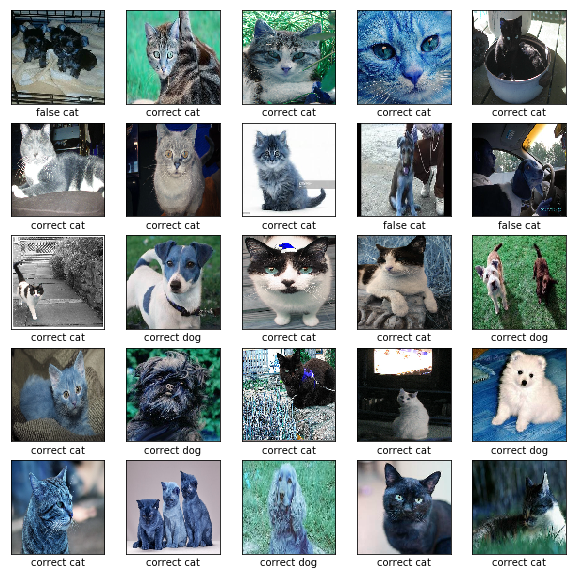

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_valid[i])
    if y_pred[i] == 0:
        if y_pred[i] == y_actual[i]:
            plt.xlabel("correct cat")
        if y_pred[i] != y_actual[i]:
            plt.xlabel("false cat")
    else:
        if y_pred[i] == y_actual[i]:
            plt.xlabel("correct dog")
        if y_pred[i] != y_actual[i]:
            plt.xlabel("false dog")

In [25]:
import cv2 
  
# Function to extract frames 
def FrameCapture(path): 
      
    # Path to video file 
    vidObj = cv2.VideoCapture(path) 
  
    # Used as counter variable 
    count = 0
  
    # checks whether frames were extracted 
    success = 1
  
    while success: 
  
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 
  
        # Saves the frames with frame-count 
        cv2.imwrite("./vid_img/frame%d.jpg" % count, image) 
  
        count += 1
    
if __name__ == '__main__': 
  
    # Calling the function 
    FrameCapture("dog_cat.mp4") 

KeyboardInterrupt: 

In [26]:
data_dir = './vid_img'

In [27]:
image_names = os.listdir(data_dir)
X = []
for image_name in image_names:
    img = cv2.imread(os.path.join(data_dir, image_name), cv2.IMREAD_COLOR)
    img = cv2.resize(img, (100,100))
    img = np.array(img)
    X.append(img)

In [28]:
X = np.array(X)

In [32]:
y_pred = model.predict(X, batch_size=batch_size, verbose=1)

1374/1374 [==============================] - 3s 2ms/step


In [33]:
y_pred = np.argmax(y_pred, axis=1)


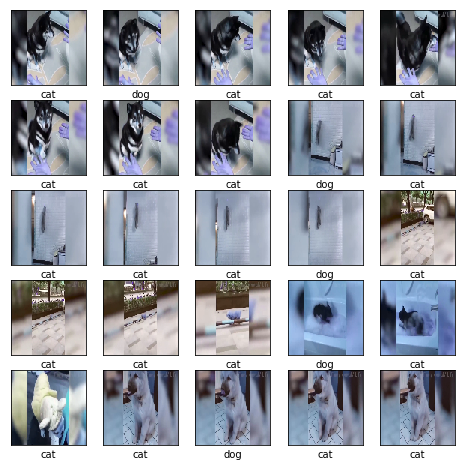

In [70]:
plt.figure(figsize=(8,8))
c = 600
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[c+i])
    if y_pred[c+i] == 0:
        plt.xlabel("cat")
       
    else:
        plt.xlabel("dog")
    c+=10
       